In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/caseyh/Desktop/footyfootyfooty/data_wrangling/round_data.csv')

In [4]:
data[data['Home Score']==data['Away Score']]

,Date,Venue,Crowd,round,year,Home,Away,Home Score,Away Score,target,...,s_round_away,position_away,result_home_l5,pf_home_l5,pa_home_l5,game played_home_l5,result_away_l5,pf_away_l5,pa_away_l5,game played_away_l5
18,Sat 25 Mar,Marvel Stadium,21215.0,3,2000,STK,WCE,116.0,116.0,False,...,3.0,6.0,0.0,199.0,273.0,2.0,4.0,224.0,193.0,2.0
74,Sat 13 May,AAMI Stadium,19511.0,10,2000,POR,GEE,78.0,78.0,False,...,10.0,3.0,0.0,414.0,602.0,5.0,12.0,529.0,509.0,5.0
372,Sat 27 Apr,Marvel Stadium,21007.0,5,2002,STK,SYD,56.0,56.0,False,...,5.0,8.0,4.0,262.0,446.0,4.0,8.0,385.0,357.0,4.0
443,Sat 6 Jul,Marvel Stadium,44864.0,14,2002,WBD,ESS,118.0,118.0,False,...,14.0,5.0,16.0,627.0,530.0,5.0,12.0,410.0,456.0,5.0
524,Sat 12 Apr,Marvel Stadium,24359.0,3,2003,NTH,BRL,109.0,109.0,False,...,3.0,1.0,8.0,190.0,141.0,2.0,8.0,190.0,137.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,Fri 25 Aug 12:00pm,GMHBA Stadium,0.0,24,2023,GEE,WBD,0.0,0.0,False,...,24.0,6.0,10.0,0.0,0.0,5.0,10.0,0.0,0.0,5.0
4263,Fri 25 Aug 12:00pm,MCG,0.0,24,2023,ESS,COL,0.0,0.0,False,...,24.0,1.0,10.0,0.0,0.0,5.0,10.0,0.0,0.0,5.0
4264,Fri 25 Aug 12:00pm,Marvel Stadium,0.0,24,2023,CAR,GWS,0.0,0.0,False,...,24.0,9.0,10.0,0.0,0.0,5.0,10.0,0.0,0.0,5.0
4265,Fri 25 Aug 12:00pm,Gabba,0.0,24,2023,BRL,STK,0.0,0.0,False,...,24.0,5.0,10.0,0.0,0.0,5.0,10.0,0.0,0.0,5.0


In [5]:
data['target'] = (data['Home Score'] > data['Away Score']).astype('int')

In [6]:
data['venue_code'] = data['Venue'].astype('category').cat.codes

In [7]:
dic = {}
for i, team in enumerate(data['Home'].unique()):
    dic[team] = i
for key in dic.keys():
    data.loc[data['Home']==key,'home_code'] = dic[key]
for key in dic.keys():
    data.loc[data['Away']==key,'away_code'] = dic[key]

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=20, random_state=1)

In [10]:
train = data[data['year'] < 2023]
test = data[(data['year'] >= 2023) & (data['round']<18)]

In [11]:
predictors = ['round', 'year',
        'pf_home', 'pa_home',
       'per_home', 'position_home', 'pf_away', 'pa_away',
        'per_away', 'position_away',
       'result_home_l5', 'pf_home_l5', 'pa_home_l5',
       'result_away_l5', 'pf_away_l5', 'pa_away_l5',
       'venue_code', 'home_code', 'away_code']

In [12]:
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=20, random_state=1)

In [50]:
rf.score(test[predictors],test['target'])

0.6875

In [52]:
preds = rf.predict(test[predictors])

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
acc = accuracy_score(test['target'], preds)

In [45]:
acc

0.6875

In [17]:
combined = pd.DataFrame(dict(actual=test['target'], prediction=preds))

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/Users/caseyh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


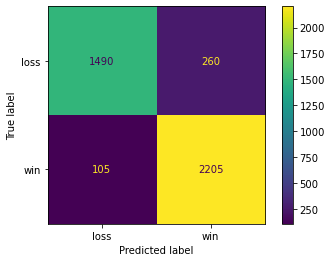

In [43]:
plot_confusion_matrix(rf,
                     train[predictors],
                     train['target'],
                     values_format='d',
                     display_labels=["loss","win"])

/Users/caseyh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


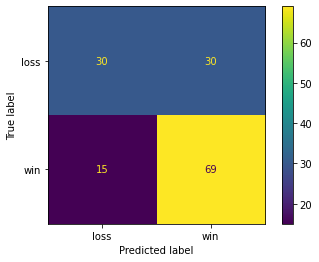

In [44]:
plot_confusion_matrix(rf,
                     test[predictors],
                     test['target'],
                     values_format='d',
                     display_labels=["loss","win"])

In [19]:
from sklearn.metrics import precision_score

In [53]:
precision_score(test['target'], preds)

0.696969696969697

In [21]:
tmp = test[['Date', 'Venue', 'Crowd', 'round', 'year', 'Home', 'Away', 'Home Score',
       'Away Score', 'target']]

In [22]:
tmp['pred'] = preds

/var/folders/ww/qljj89hs53b_mxcs8j00tyfw0000gn/T/ipykernel_7534/248875153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['pred'] = preds


In [54]:
tmp.shape[0] * acc + 2

101.0

In [55]:
tmp[]

,Date,Venue,Crowd,round,year,Home,Away,Home Score,Away Score,target,pred
4065,Sat 18 Mar 7:25pm,MCG,48103.0,1,2023,MEL,WBD,115.0,65.0,1,0
4074,Sat 25 Mar 7:25pm,Marvel Stadium,33294.0,2,2023,WBD,STK,41.0,92.0,0,0
4078,Thu 30 Mar 7:20pm,Marvel Stadium,23665.0,3,2023,WBD,BRL,67.0,53.0,1,1
4090,Sat 8 Apr 4:35pm,MCG,56449.0,4,2023,RCH,WBD,84.0,89.0,0,1
4101,Sat 15 Apr 7:20pm,Adelaide Oval,45115.0,5,2023,POR,WBD,70.0,56.0,1,1
4105,Fri 21 Apr 6:10pm,Optus Stadium,47503.0,6,2023,FRE,WBD,69.0,118.0,0,1
4117,Sat 29 Apr 4:35pm,Marvel Stadium,40119.0,7,2023,WBD,HAW,94.0,65.0,1,1
4128,Sat 6 May 7:30pm,Manuka Oval,10039.0,8,2023,GWS,WBD,71.0,86.0,0,0
4138,Sat 13 May 7:30pm,Marvel Stadium,42756.0,9,2023,CAR,WBD,59.0,79.0,0,1
4143,Sat 20 May 2:10pm,Mars Stadium,10114.0,10,2023,WBD,ADE,85.0,40.0,1,1


## Feature Importance

In [56]:
pd.Series(rf.feature_importances_, predictors)

round             0.019292
year              0.041450
pf_home           0.045555
pa_home           0.046851
per_home          0.115109
position_home     0.072098
pf_away           0.045603
pa_away           0.051232
per_away          0.104406
position_away     0.051211
result_home_l5    0.029735
pf_home_l5        0.055815
pa_home_l5        0.061958
result_away_l5    0.024866
pf_away_l5        0.059304
pa_away_l5        0.064822
venue_code        0.034590
home_code         0.037622
away_code         0.038479
dtype: float64

## Predict Next Round

In [59]:
current = data[(data['year'] >= 2023) & (data['round']==18)]

In [60]:
preds = rf.predict(current[predictors])

In [61]:
current_preds = current[['Date', 'Venue', 'Crowd', 'round', 'year', 'Home', 'Away', 'Home Score',
       'Away Score']]

In [62]:
current_preds['prediction'] = preds

/var/folders/ww/qljj89hs53b_mxcs8j00tyfw0000gn/T/ipykernel_7534/2172267789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_preds['prediction'] = preds


In [63]:
current_preds

,Date,Venue,Crowd,round,year,Home,Away,Home Score,Away Score,prediction
4204,Thu 13 Jul 7:20pm,SCG,0.0,18,2023,SYD,WBD,0.0,0.0,1
4205,Fri 14 Jul 7:50pm,MCG,0.0,18,2023,MEL,BRL,0.0,0.0,0
4206,Sat 15 Jul 1:45pm,MCG,0.0,18,2023,COL,FRE,0.0,0.0,1
4207,Sat 15 Jul 2:10pm,Heritage Bank Stadium,0.0,18,2023,GCS,STK,0.0,0.0,0
4208,Sat 15 Jul 4:35pm,Marvel Stadium,0.0,18,2023,CAR,POR,0.0,0.0,0
4209,Sat 15 Jul 7:10pm,Adelaide Oval,0.0,18,2023,ADE,GWS,0.0,0.0,1
4210,Sat 15 Jul 7:25pm,GMHBA Stadium,0.0,18,2023,GEE,ESS,0.0,0.0,1
4211,Sun 16 Jul 1:10pm,Marvel Stadium,0.0,18,2023,NTH,HAW,0.0,0.0,1
4212,Sun 16 Jul 2:40pm,Optus Stadium,0.0,18,2023,WCE,RCH,0.0,0.0,0
